# **Introduction**

A lending credit risk analysis is a final task of Rakamin Academy id/x partners data scientist project based internship program. The goal of this task is to apply the knowledge for real world as junior data scientist.

In this scenario, I have been tasked with building a model to predict credit risk using a dataset provided by the company, consisting of both accepted and rejected loan data. Additionally, I am responsible for preparing visual media to present the solution to the client.  

# **About Credit Risk**

# **Data Dictionary**

# **Import Necessary Package**

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, f1_score)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# **Importing Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/loan_data_2007_2014.csv", index_col =0)
df

<ipython-input-82-12e63a9beac1>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Data/loan_data_2007_2014.csv", index_col =0)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,N

# **Exploring Data**

The goal : To have better understanding for which variable are relevant

In [ ]:
# total rows and columns
df.shape

(466285, 74)

In [ ]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
df.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
975,1018385,1246619,7000,7000,7000.0,36 months,6.62,214.93,A,A2,NaN,NaN,MORTGAGE,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,car,Car Loan,921xx,CA,11.45,0.0,Feb-82,3.0,46.0,NaN,10.0,0.0,14381,22.9,24.0,f,0.0,0.0,7580.27,7580.27,7000.0,580.27,0.0,0.0,0.0,Aug-13,3506.92,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.id.nunique()

466285

In [ ]:
df.id.nunique()

466285

In [ ]:
df.member_id.nunique()

466285

It can be observed that the variables 'id' and 'member_id' don't have duplicates, indicating that each row represents a unique value. Therefore, it is free text and have zero values (NULL).

All variables that are free text, unique id, or all the columns is NaN values in nature will be removed as they are deemed irrelevant for the model analysis process.


In [ ]:
cols_to_drop = [
    'id',
    'member_id',
    'url',
    'desc',
    'zip_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'sub_grade'
]

In [ ]:
data = df.drop(cols_to_drop, axis=1)

In [ ]:
data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
383629,25000,25000,24950.0,36 months,14.99,866.52,C,NaN,NaN,MORTGAGE,93000.0,Verified,May-14,Current,n,debt_consolidation,Debt consolidation,NC,33.73,0.0,Sep-92,1.0,44.0,NaN,15.0,0.0,23536,40.1,25.0,f,13197.64,13171.24,16463.88,16430.95,11802.36,4661.52,0.0,0.0,0.0,Jan-16,866.52,Feb-16,Jan-16,0.0,57.0,1,INDIVIDUAL,0.0,0.0,371934.0,54200.0
169889,13750,13750,13750.0,36 months,14.09,470.55,B,Home Instead Senior Care,2 years,RENT,39000.0,Not Verified,Feb-13,Current,n,debt_consolidation,Debt consolidation,NJ,27.85,0.0,Dec-98,0.0,77.0,NaN,11.0,0.0,11636,51.2,22.0,f,485.36,485.36,16469.26,16469.26,13264.64,3204.62,0.0,0.0,0.0,Jan-16,470.55,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,84329.0,22725.0
278861,3000,3000,3000.0,36 months,12.49,100.35,B,NaN,NaN,MORTGAGE,10600.0,Verified,Oct-14,Current,n,credit_card,Debt consolidation,TN,14.61,0.0,May-94,1.0,27.0,63.0,13.0,1.0,4545,13.6,37.0,f,1884.06,1884.06,1501.09,1501.09,1115.94,385.15,0.0,0.0,0.0,Jan-16,100.35,Feb-16,Jan-16,0.0,66.0,1,INDIVIDUAL,0.0,118.0,4545.0,33500.0
70527,7200,7200,7200.0,36 months,14.30,247.13,C,Night Supervisor,7 years,MORTGAGE,25000.0,Verified,Nov-13,Charged Off,n,credit_card,Second Loan,AZ,26.16,0.0,Apr-08,2.0,NaN,NaN,7.0,0.0,6247,60.1,10.0,f,0.00,0.00,4447.02,4447.02,3216.77,1230.25,0.0,0.0,0.0,May-15,247.13,NaN,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,21887.0,10400.0
249099,35000,35000,35000.0,36 months,8.19,1099.85,A,Librarian IV,10+ years,RENT,90000.0,Verified,Nov-14,Current,n,credit_card,Credit card refinancing,IL,12.65,0.0,Oct-88,0.0,NaN,NaN,11.0,0.0,11938,19.7,19.0,w,22396.74,22396.74,15381.98,15381.98,12603.26,2778.72,0.0,0.0,0.0,Jan-16,1099.85,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,40423.0,60700.0


# **Define Target Variable**

The goal for this project is to make prediction to individual's ability to repay the loan/credit provided. Therefore, the target variable should reflect an individual's performance in this regard.

the 'loan_status' variable can be used as the target variable as it reflect each individual's repayment performance on their loans/credits.

In [ ]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

It can be see that loan_status have several unique values:

1. Current : smooth payment
2. Charged Off : Delayed payment resulting in write-off
3. Late : delayed payment made
4. In Grace Period : payment in the grace period
5. Fully Paid : paid
6. Default : delayed payment  


From that definitions, each individual's can be marked as either a "bad loan" or "good loan"

Definition from bad and good loan can have different interpretation depend on what business needs. In this scenario, I will use late(31-120 days) and worst than that marked as bad loan.

In [ ]:
bad_status = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged off',
    'Late (31-120 days)'
]

data['status'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [ ]:
data.drop('loan_status', axis=1, inplace=True)

In [ ]:
data['status'].value_counts(normalize=True)*100

0    89.232551
1    10.767449
Name: status, dtype: float64

After labeling, another problem arises where the number of bad loans is significantly lower than that of good loans. This issue is known as an imbalanced dataset.


# **Data Preprocessing, Feature Engineering**

In this step, I will perform modification on several features to formalize them for easier processing in modeling. For example change data type object into appropiate data type for model prediction.


In [ ]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

To convert the 'emp_length' variable into numeric format, any non-numeric values must be removed. I utilize the str.replace method to eliminate non-numeric values, and subsequently, I convert the data type to float.


In [ ]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

<ipython-input-97-a93402c6aad3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')


In [ ]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [ ]:
data.drop('emp_length', axis=1, inplace=True)

In [ ]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [ ]:
data.drop('term', axis=1, inplace=True)

In [ ]:
data[['emp_length_int','term_int']].head(5)

,emp_length_int,term_int
0,10.0,36.0
1,0.0,60.0
2,10.0,36.0
3,10.0,36.0
4,1.0,60.0


I want to modify the 'earliest_cr_line' variable from a month-year format to calculate how much time has passed since that moment. Typically, this involves using a reference date, which is usually the current date. However, since this dataset spans from 2007 to 2014, it would be more relevant to use a reference date closer to the end of that period, such as December 1, 2017.


In [ ]:
data['earliest_cr_line'].head(5)

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [ ]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(5)

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [ ]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1,'M')))
data['mths_since_earliest_cr_line'].head(5)

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Strange, there is negative values in there

In [ ]:
data[data['mths_since_earliest_cr_line'] < 0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


Ah... it seems there is a problem in the Python interpretation where the year '62' becomes '2062' instead of '1962'.

For this issue, I'll need to perform another preprocessing step.

In [ ]:
def convert_year(x):
    year = x.year
    if year > 2026:
        return year - 100
    else:
        return year

data['earliest_cr_line_date'] = data['earliest_cr_line_date'].apply(convert_year)
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line_date'], format='%Y')


data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line_date'], format = '%b-%Y')
data['earliest_cr_line_date']

0        1985-01-01
1        1999-01-01
2        2001-01-01
3        1996-01-01
4        1996-01-01
            ...    
466280   2003-01-01
466281   1997-01-01
466282   2001-01-01
466283   2003-01-01
466284   2000-01-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [ ]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1,'M')))
data['mths_since_earliest_cr_line'].head(5)

0    395.0
1    227.0
2    203.0
3    263.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        248.253226
std          86.892199
min          83.000000
25%         191.000000
50%         227.000000
75%         287.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

For all variables with data type of date, the preprocessing process is the same as that for the variable 'earliest_cr_line'

In [ ]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [ ]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [ ]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [ ]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

In [ ]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [ ]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [ ]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [ ]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# **Exploratory Data Analysis**



<ipython-input-125-8966bf0b663b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

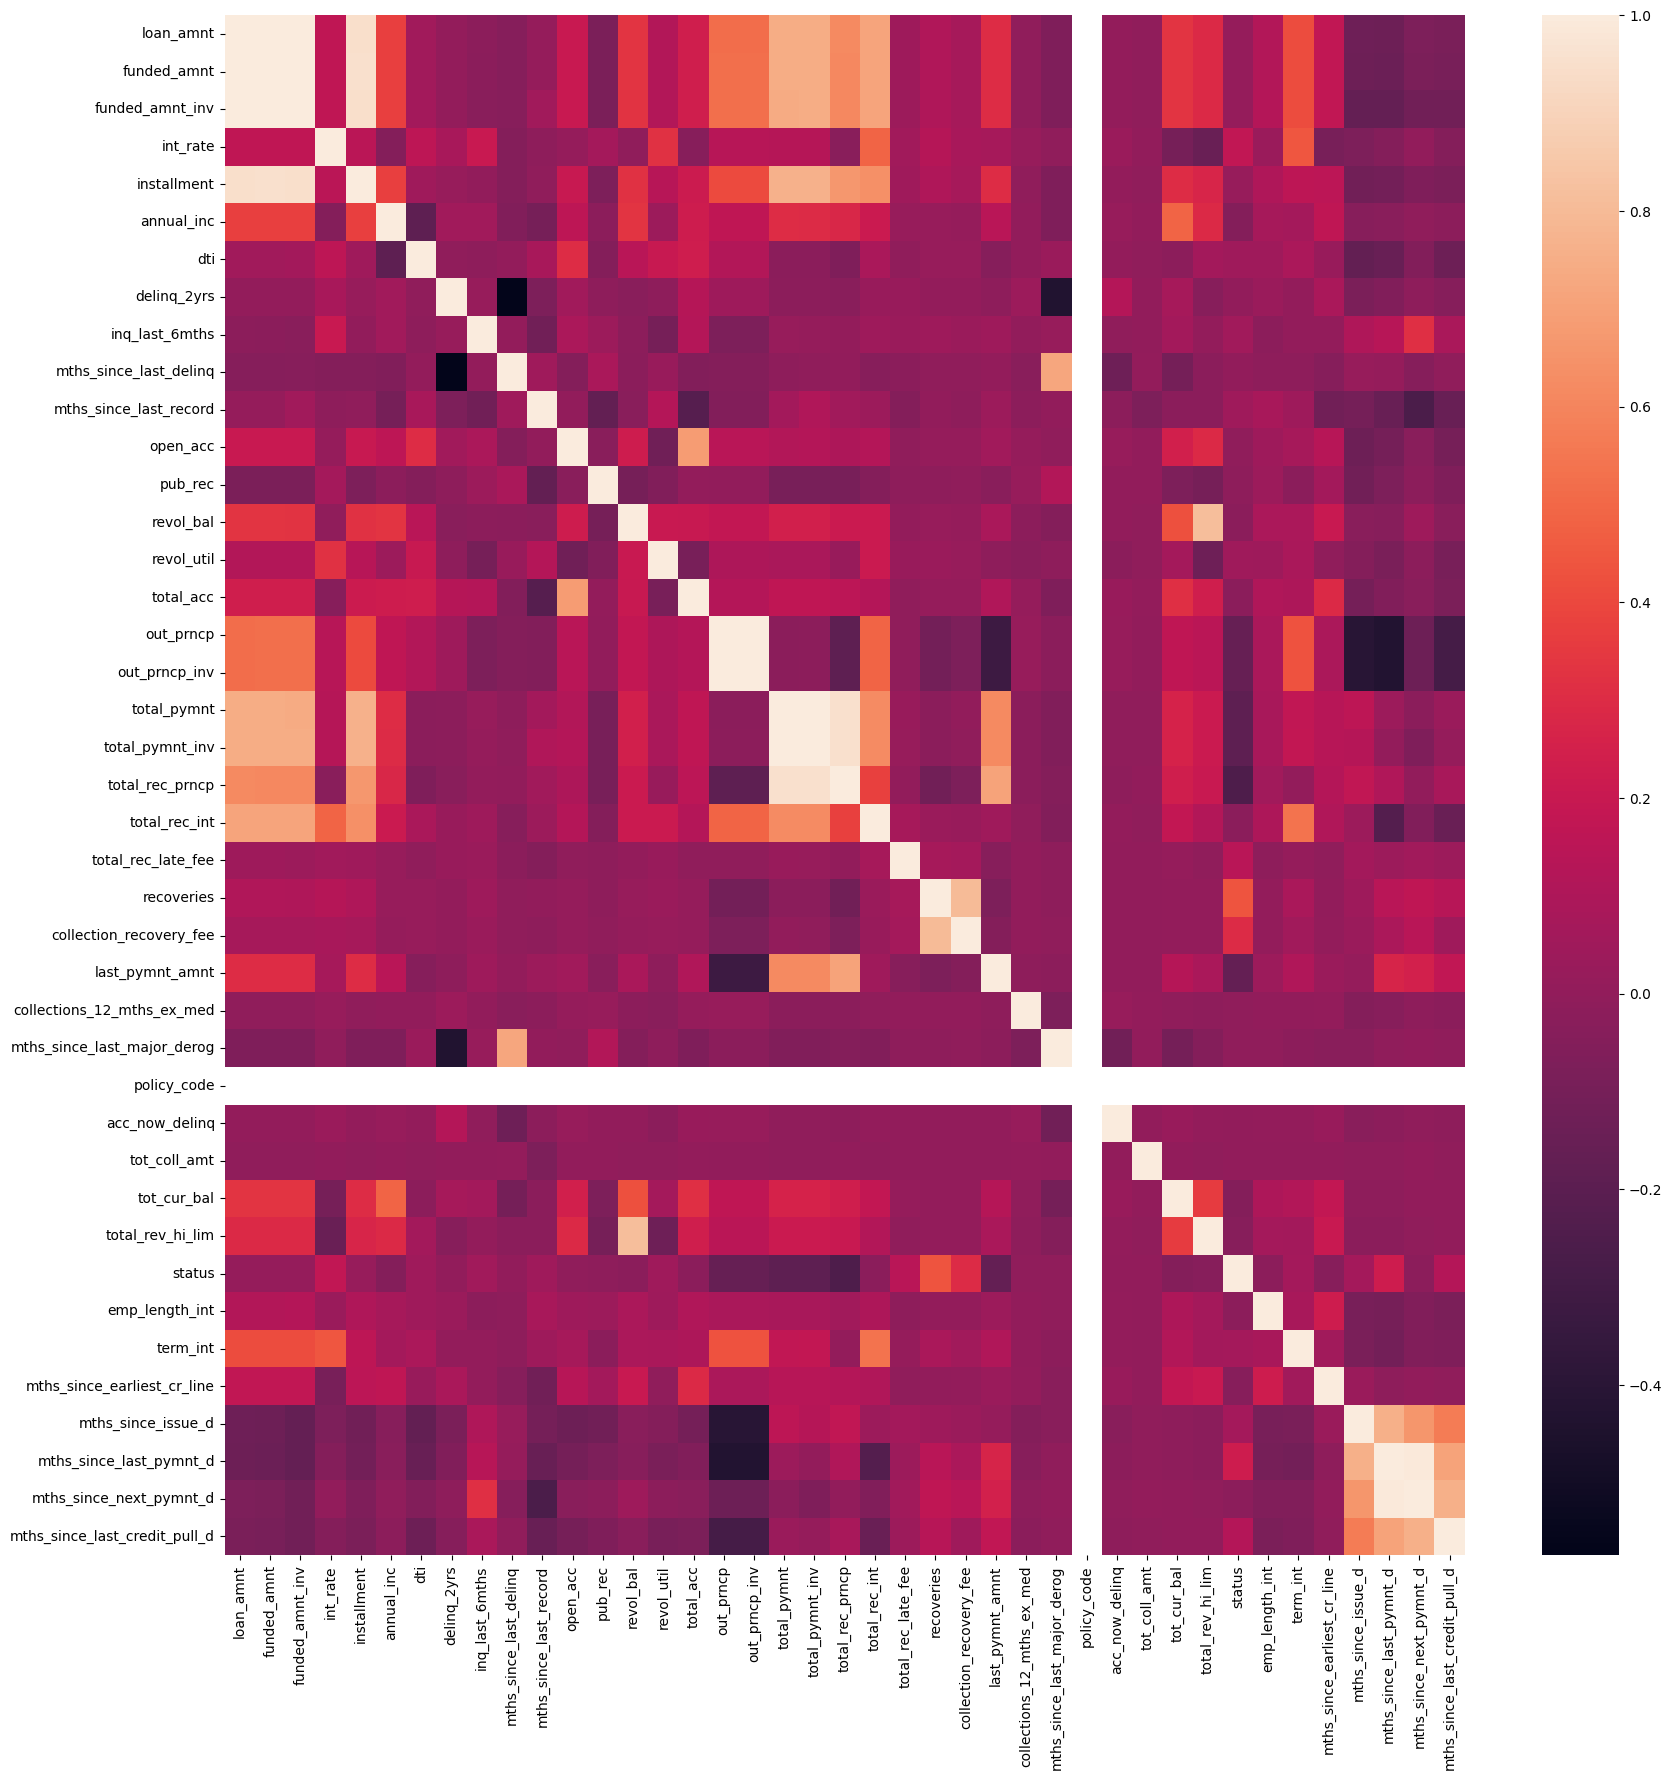

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

If there are pairs of features with high corellation, then one of them will be selected. The threshold value for what constitutes high correlation is not definite, typically a value of corellation 0.7 is used.

In [ ]:
matrix_corr = data.corr().abs()
upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(np.bool_))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-126-250509ecff2d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = data.corr().abs()


In [ ]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [ ]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

For the next step, the features with very high cardinality and features with only one unique value are discarded.

Because high cardinalty mean features have large number of unique that can lead to overfitting and inefficiency. On the other hand, features with only one unique value do not vary across the dataset, making them irrelevant for modeling as they do not contribute any discriminatory information.

In [ ]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

The variables that will be discarded are 'emp_title', 'title', and 'application_type'

In [ ]:
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [ ]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
status                              2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line        65
mths_since_issue_d                 91
dtype: int64

It seemed that data types other than object also contain features with only one unique value, so those variables will also be discarded



In [ ]:
data.drop(['policy_code'], axis=1, inplace=True)

In [ ]:
for col in data.select_dtypes(include='object').columns.tolist():
  print(data[col].value_counts(normalize=True)*100)
  print('/n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64
/n
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64
/n
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64
/n
n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64
/n
debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64
/n
CA    15.323247

From what I observed, it seemes like the variable 'pymnt_plan' has a high imbalance, with one value being heavily dominant compared to the other. Therefore, I plan to discard this variable

In [ ]:
data.drop('pymnt_plan', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   int_rate                     466285 non-null  float64
 2   grade                        466285 non-null  object 
 3   home_ownership               466285 non-null  object 
 4   annual_inc                   466281 non-null  float64
 5   verification_status          466285 non-null  object 
 6   purpose                      466285 non-null  object 
 7   addr_state                   466285 non-null  object 
 8   dti                          466285 non-null  float64
 9   delinq_2yrs                  466256 non-null  float64
 10  inq_last_6mths               466256 non-null  float64
 11  mths_since_last_delinq       215934 non-null  float64
 12  mths_since_last_record       62638 non-null   float64
 13 

After I have made some modifications and dropped columns, the remaining columns in the dataset are 30 out of 73



# **Data Cleaning**

In this step I will do missing value checking and fill it or drop it if the missing value more than 75%

In [ ]:
check = data.isnull().sum() * 100 / data.shape[0]
check[check > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

In [ ]:
data.drop('mths_since_last_record', axis=1, inplace=True)

# Missing Values Filling

there is several methods to fill the missing values. Fill it with mean, median, or mode values. Mean is the most common method to use to fill the missing value, or fill it with '0' it depends what business need

In [ ]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

# **Feature Scaling**

every categorical columns I use One Hot encoding

In [ ]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [ ]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [ ]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Standardization

all of numeric columns do standard process with StandardScaler.

In [ ]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['status']]

In [ ]:
scaler = StandardScaler()
std = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)

std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.688641,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.244361,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.520504,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.169853,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.169853,1.446626


After standardization is completed, I merge back all the resulting transformation columns

In [ ]:
data_model = pd.concat([onehot, std, data[['status']]], axis=1)

# **Modelling**

# Train Test Split

In [ ]:
X = data_model.drop('status', axis=1)
y = data_model['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# print
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (373028, 99)
y_train: (373028,)
X_test: (93257, 99)
y_test: (93257,)


# Training

for this scenario, I will use Random Forest and XGBoost to compare which one have the best performance

# Random Forest Model

In [ ]:
# create random forest model
rf = RandomForestClassifier(max_depth=4)

In [ ]:
# train the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

Displaying the feature importance

In [ ]:
arr_feature_importances = rf.feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
90,recoveries,5.681440e-01
88,out_prncp,1.672225e-01
89,total_rec_late_fee,1.018794e-01
77,int_rate,4.442126e-02
3,grade_E,1.804095e-02
98,mths_since_issue_d,1.604578e-02
96,term_int,1.120854e-02
78,annual_inc,9.138027e-03
2,grade_D,8.763633e-03
4,grade_F,8.280563e-03


# Validation

For measure model performance, two metrics generally use for credit risk are AUC and KS

In [ ]:
y_pred = rf.predict_proba(X_test)[:][:,1]

actual_predict = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred, columns=['y_pred_proba'])], axis=1)
actual_predict.index = y_test.index

# AUC

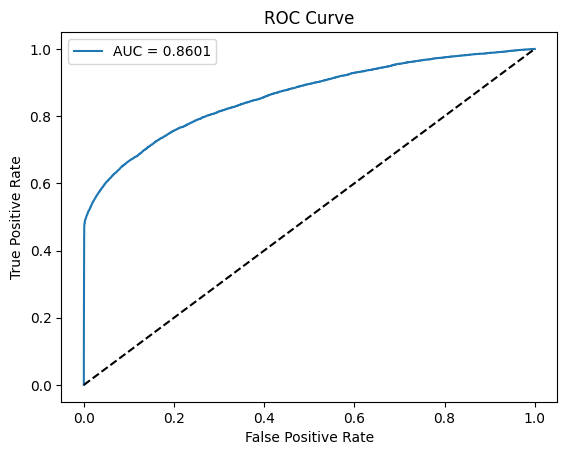

In [ ]:
fpr, tpr, tr = roc_curve(actual_predict['y_actual'], actual_predict['y_pred_proba'])
auc = roc_auc_score(actual_predict['y_actual'], actual_predict['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# XGBoost

In [ ]:
XGB = XGBClassifier(max_depth=4)

In [ ]:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
arr_feature_importances = XGB.feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
90,recoveries,0.782095
89,total_rec_late_fee,0.031726
77,int_rate,0.017351
88,out_prncp,0.015088
98,mths_since_issue_d,0.010988
96,term_int,0.009779
75,initial_list_status_w,0.009082
10,home_ownership_RENT,0.008728
79,dti,0.007166
78,annual_inc,0.006807


# Validation

In [ ]:
y_pred = XGB.predict_proba(X_test)[:][:,1]

actual_predict = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred, columns=['y_pred_proba'])], axis=1)
actual_predict.index = y_test.index

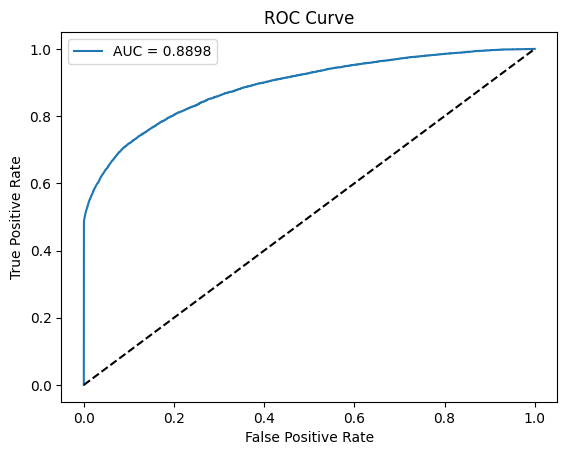

In [ ]:
fpr, tpr, tr = roc_curve(actual_predict['y_actual'], actual_predict['y_pred_proba'])
auc = roc_auc_score(actual_predict['y_actual'], actual_predict['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# KS

In [ ]:
actual_predict = actual_predict.sort_values('y_pred_proba')
actual_predict = actual_predict.reset_index()

actual_predict['Cumulative N Population'] = actual_predict.index + 1
actual_predict['Cumulative N Bad'] = actual_predict['y_actual'].cumsum()
actual_predict['Cumulative N Good'] = actual_predict['Cumulative N Population'] - actual_predict['Cumulative N Bad']
actual_predict['Cumulative Perc Population'] = actual_predict['Cumulative N Population'] / actual_predict.shape[0]
actual_predict['Cumulative Perc Bad'] = actual_predict['Cumulative N Bad'] / actual_predict['y_actual'].sum()
actual_predict['Cumulative Perc Good'] = actual_predict['Cumulative N Good'] / (actual_predict.shape[0] - actual_predict['y_actual'].sum())

In [ ]:
actual_predict.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,279378,0,0.046461,1,0,1,0.000011,0.0,0.000012
1,334474,0,0.046480,2,0,2,0.000021,0.0,0.000024
2,463051,0,0.046597,3,0,3,0.000032,0.0,0.000036
3,297954,0,0.046657,4,0,4,0.000043,0.0,0.000048
4,318621,0,0.046664,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov: 0.5668')

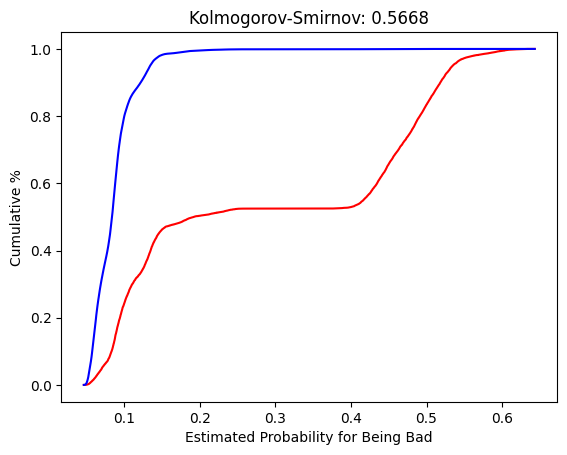

In [ ]:
KS = max(actual_predict['Cumulative Perc Good'] - actual_predict['Cumulative Perc Bad'])

plt.plot(actual_predict['y_pred_proba'], actual_predict['Cumulative Perc Bad'], color='r')
plt.plot(actual_predict['y_pred_proba'], actual_predict['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov: %0.4f' %KS)

# **Conclusion**

1. Based on the evaluation metrics, XGBoost model generally outperformed the Random Forest model in terms of predictive accuracy. The higher AUC score model suggests that XGBoost model provides better discrimination between the positive and negative classes, making it more effective in distinguishing between creditworthy and non-creditworthy borrowers. However, it's important to consider other factors before making the final decision.

2. Variable recoveries has a high level of importance in the both models of XGBoost and Random forest. This indicates that the amount recovered from previously problematic loans can greatly influence the predictions made by the model.

3. A KS score of 0.57 indicates that the model has a moderate to good dicriminatory power in distinguishing between high-risk and low-risk groups.
